In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/ashwa/Downloads/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
extra = data[data.duplicated()]
extra.shape

(240, 12)

In [5]:
# Let's proceed to separate 'quality' as the target variable and the rest as features.
y = data.quality                  # set 'quality' as target
X = data.drop('quality', axis=1)  # rest are features
print(y.shape, X.shape)           # check correctness

(1599,) (1599, 11)


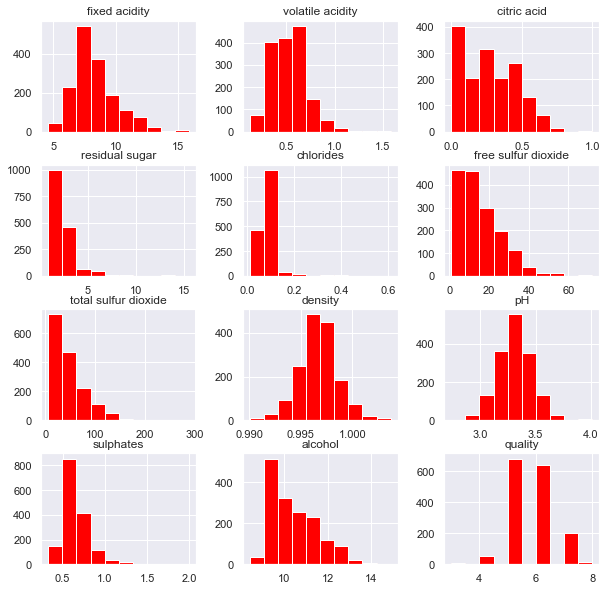

In [6]:
sns.set()
data.hist(figsize=(10,10), color='red')
plt.show()


<AxesSubplot:title={'center':'Correlation of Features'}>

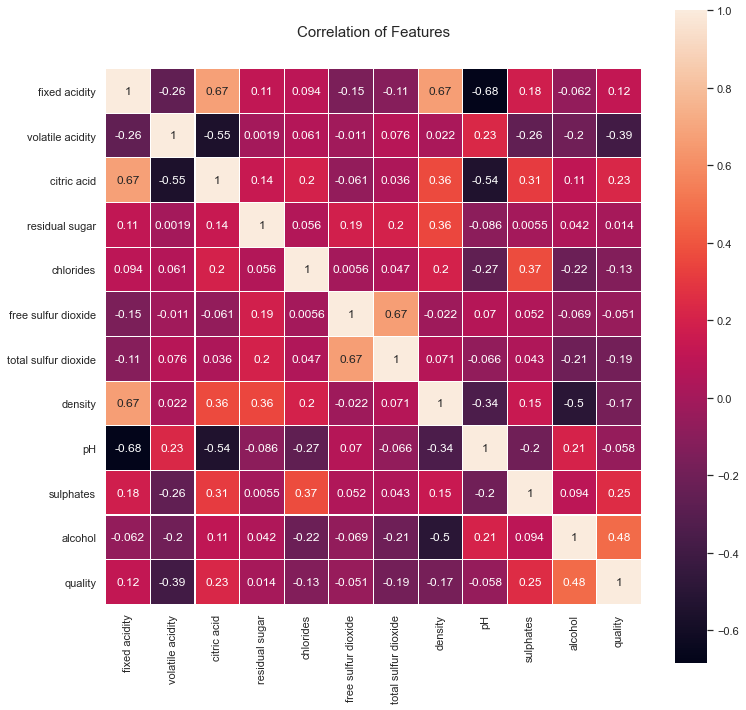

In [7]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='white', annot=True)

In [8]:
y1 = (y > 5).astype(int)
y1.head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int32

Text(0.5, 0, 'aggregated target value')

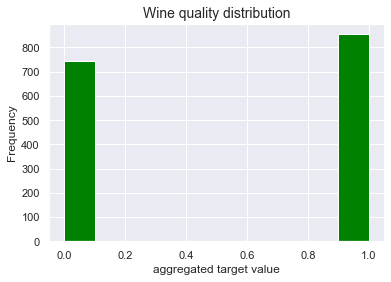

In [9]:
ax = y1.plot.hist(color='green')
ax.set_title('Wine quality distribution', fontsize=14)
ax.set_xlabel('aggregated target value')


In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix

In [11]:
seed = 8 # set seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2,
                                                    random_state=seed)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1279, 11) (320, 11) (1279,) (320,)


In [13]:
# Instantiate the Random Forest Classifier
RF_clf = RandomForestClassifier(random_state=seed)
RF_clf

RandomForestClassifier(random_state=8)

In [14]:
# Compute k-fold cross validation on training dataset and see mean accuracy score
cv_scores = cross_val_score(RF_clf,X_train, y_train, cv=10, scoring='accuracy')
print('The accuracy scores for the iterations are {}'.format(cv_scores))
print('The mean accuracy score is {}'.format(cv_scores.mean()))

The accuracy scores for the iterations are [0.8046875  0.8125     0.8203125  0.8515625  0.78125    0.7578125
 0.7734375  0.84375    0.796875   0.81102362]
The mean accuracy score is 0.8053211122047245


In [15]:
RF_clf.fit(X_train, y_train)
pred_RF = RF_clf.predict(X_test)


In [16]:
# Print 5 results to see
for i in range(0,5):
    print('Actual wine quality is ', y_test.iloc[i], ' and predicted is ', pred_RF[i])

Actual wine quality is  0  and predicted is  0
Actual wine quality is  0  and predicted is  0
Actual wine quality is  1  and predicted is  1
Actual wine quality is  1  and predicted is  1
Actual wine quality is  1  and predicted is  1


In [17]:
print(accuracy_score(y_test, pred_RF))
print(log_loss(y_test, pred_RF))

0.825
6.044345838916635
